In [86]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import sys
sys.path.append("../../")
import numpy as np

In [87]:
from src.basis import CircuitTemplate
from src.utils.custom_gates import RiSwapGate

basis = CircuitTemplate(preseed=False, use_polytopes=0, no_exterior_1q=0)
basis.spanning_range = range(2,3)

In [88]:
from src.cost_function import BasicCost as Cost
objective = Cost()

from src.cost_function import MakhlinFunctionalCost as AdvancedCost
#objective = AdvancedCost()

In [89]:
from src.optimizer import TemplateOptimizer
optimizer = TemplateOptimizer(basis=basis, objective=objective, use_callback=True, override_fail=True)

In [90]:
from src.sampler import Haar2Sample as HaarSample
from src.sampler import GateSample
sampler = HaarSample(seed=0,n_samples=20)
from qiskit.circuit.library.standard_gates import SwapGate
#sampler = GateSample(SwapGate())
ret = optimizer.approximate_from_distribution(sampler=sampler)

INFO:root:Starting sample iter 0
INFO:root:Begin search: (0.71028244, 0.11334628, 0.02334538)
INFO:root:Starting opt on template size 2
INFO:root:Break on cycle 2
INFO:root:Loss=8.500955495094331e-11
INFO:root:Success: (0.71028244, 0.11334628, 0.02334538)
INFO:root:Starting sample iter 1
INFO:root:Begin search: (0.43788992, 0.37620284, 0.02021303)
INFO:root:Starting opt on template size 2
INFO:root:Break on cycle 2
INFO:root:Loss=7.89259768652073e-11
INFO:root:Success: (0.43788992, 0.37620284, 0.02021303)
INFO:root:Starting sample iter 2
INFO:root:Begin search: (0.53215427, 0.26371115, 0.1463595)
INFO:root:Starting opt on template size 2
INFO:root:Loss=1.225972656726526e-10
INFO:root:Fail: (0.53215427, 0.26371115, 0.1463595), Alternative: (0.53215245, 0.26371087, 0.14635825)
INFO:root:Starting sample iter 3
INFO:root:Begin search: (0.41893503, 0.16052811, 0.01158052)
INFO:root:Starting opt on template size 2
INFO:root:Loss=1.1942513644669361e-10
INFO:root:Fail: (0.41893503, 0.16052811,

In [100]:
#average convergence
np.average([min([fk for fk in el if fk >=0]) for el in ret[0]])
#average training iters
[len(el[2:]) for el in ret[0]]

[106,
 106,
 178,
 178,
 178,
 259,
 259,
 259,
 259,
 259,
 304,
 304,
 304,
 304,
 304,
 408,
 408,
 408,
 408,
 408,
 42,
 405,
 405,
 405,
 405,
 405,
 90,
 157,
 157,
 157,
 150,
 150,
 150,
 43,
 123,
 123,
 314,
 314,
 314,
 314,
 314,
 46,
 102,
 102,
 244,
 244,
 244,
 244,
 244,
 256,
 256,
 256,
 256,
 256,
 243,
 243,
 243,
 243,
 243,
 290,
 290,
 290,
 290,
 290,
 336,
 336,
 336,
 336,
 336]

In [92]:
%matplotlib inline

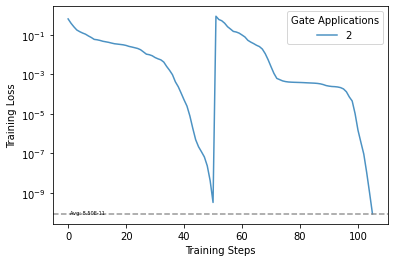

In [93]:
from src.utils.visualize import optimizer_training_plot, training_loss_plot
import matplotlib.pyplot as plt
plt.close()
fig = plt.figure(figsize=(6,4))
axs = fig.add_subplot(111)
fig = training_loss_plot(axs, ret[0][0])
plt.savefig("/home/evm9/decomposition_EM/images/fig1.pdf", facecolor='white')
plt.savefig("/home/evm9/decomposition_EM/images/fig1.png", facecolor='white')